In [2]:
import os, time
import math
import rasterio
import numpy as np
from spectral import *
import gdal
from gdal import *
from gdal import osr
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
hyper_spec_image= r'D:\AA_GEOINFO_IIST\AA_LABS\RS\lab_5\spot_test_data_tiff'

In [4]:
dataset = rasterio.open(hyper_spec_image)
Crs = dataset.crs
trans = dataset.transform
cols = dataset.width
rows = dataset.height
bands= dataset.count

In [5]:
print(dataset)
print(Crs)
print(trans)
print(cols,rows,bands)

<open DatasetReader name='D:\AA_GEOINFO_IIST\AA_LABS\RS\lab_5\class_tiff_ah' mode='r'>
EPSG:32642
| 0.71, 8.07, 863340.93|
| 8.07,-0.71, 2545687.22|
| 0.00, 0.00, 1.00|
350 350 351


In [6]:
with rasterio.open(hyper_spec_image) as r:
    raster_mat=r.read()

In [7]:
raster_mat_1=raster_mat.T

spectral:INFO: k-means iteration 1 - 110157 pixels reassigned.
spectral:INFO: k-means iteration 2 - 10670 pixels reassigned.
spectral:INFO: k-means iteration 3 - 8560 pixels reassigned.
spectral:INFO: k-means iteration 4 - 7594 pixels reassigned.
spectral:INFO: k-means iteration 5 - 7939 pixels reassigned.
spectral:INFO: k-means iteration 6 - 9694 pixels reassigned.
spectral:INFO: k-means iteration 7 - 11978 pixels reassigned.
spectral:INFO: k-means iteration 8 - 9881 pixels reassigned.
spectral:INFO: k-means iteration 9 - 7021 pixels reassigned.
spectral:INFO: k-means iteration 10 - 5405 pixels reassigned.
spectral:INFO: k-means iteration 11 - 4648 pixels reassigned.
spectral:INFO: k-means iteration 12 - 4326 pixels reassigned.
spectral:INFO: k-means iteration 13 - 4159 pixels reassigned.
spectral:INFO: k-means iteration 14 - 3969 pixels reassigned.
spectral:INFO: k-means iteration 15 - 3847 pixels reassigned.
spectral:INFO: k-means iteration 16 - 3711 pixels reassigned.
spectral:INFO

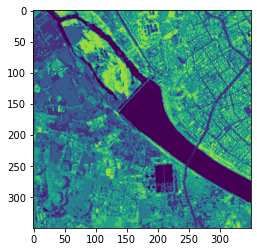

In [8]:
(m, c) = kmeans(raster_mat_1, 9, 30)

plt.imshow(m.T)

spectral:INFO: k-means iteration 1 - 110157 pixels reassigned.
spectral:INFO: k-means iteration 2 - 10670 pixels reassigned.
spectral:INFO: k-means iteration 3 - 8560 pixels reassigned.
spectral:INFO: k-means iteration 4 - 7594 pixels reassigned.
spectral:INFO: k-means iteration 5 - 7939 pixels reassigned.
spectral:INFO: k-means iteration 6 - 9694 pixels reassigned.
spectral:INFO: k-means iteration 7 - 11978 pixels reassigned.
spectral:INFO: k-means iteration 8 - 9881 pixels reassigned.
spectral:INFO: k-means iteration 9 - 7021 pixels reassigned.
spectral:INFO: k-means iteration 10 - 5405 pixels reassigned.
spectral:INFO: k-means iteration 11 - 4648 pixels reassigned.
spectral:INFO: k-means iteration 12 - 4326 pixels reassigned.
spectral:INFO: k-means iteration 13 - 4159 pixels reassigned.
spectral:INFO: k-means iteration 14 - 3969 pixels reassigned.
spectral:INFO: k-means iteration 15 - 3847 pixels reassigned.
spectral:INFO: k-means iteration 16 - 3711 pixels reassigned.
spectral:INFO

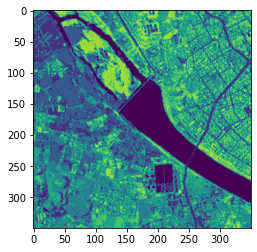

In [9]:
(m, c) = kmeans(raster_mat_1, 9, 50)

plt.imshow(m.T)

In [12]:
file_gt=r'D:\AA_GEOINFO_IIST\AA_LABS\RS\lab 7\roi_class_img'

In [13]:
dataset1=rasterio.open(file_gt)
print(dataset1)

<open DatasetReader name='D:\AA_GEOINFO_IIST\AA_LABS\RS\lab 7\roi_class_img' mode='r'>


In [14]:
Crs1 = dataset1.crs
trans1 = dataset1.transform
cols1 = dataset1.width
rows1 = dataset1.height
bands1 = dataset1.count

In [15]:
print(Crs1)
print(trans1)
print(cols1,rows1,bands1)

EPSG:32642
| 0.71, 8.07, 863340.93|
| 8.07,-0.71, 2545687.22|
| 0.00, 0.00, 1.00|
350 350 1


In [16]:
with rasterio.open(file_gt) as r:
    raster_matrix_gt= r.read()

In [17]:
raster_matrix_gt=raster_matrix_gt.reshape(cols1,rows1).T
gt=raster_matrix_gt

In [18]:
classes = create_training_classes(raster_mat_1, gt)

spectral:INFO: Setting min samples to 351
spectral:WARNING: Omitting class  11 : only 139 samples present
spectral:WARNING: Omitting class  13 : only 300 samples present


Processing...  0.0Processing... 16.7Processing... 33.3Processing... 50.0Processing... 66.7Processing... 83.3Processing... 100.Processing...done   


C:\Users\win\Anaconda3\envs\geo_lib\lib\site-packages\spectral\graphics\spypylab.py:904: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  self.class_axes = plt.imshow(self.class_rgb, **kwargs)


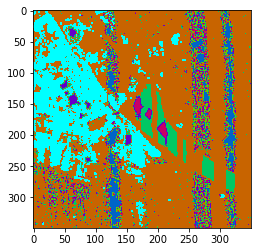

In [19]:
gmlc=GaussianClassifier(classes)
clmap=gmlc.classify_image(raster_mat_1)
gc=imshow(classes=clmap.T)

spectral:INFO: Setting min samples to 351
spectral:WARNING: Omitting class  11 : only 139 samples present
spectral:WARNING: Omitting class  13 : only 300 samples present


Processing...  0.0Processing... 16.7Processing... 33.3Processing... 50.0Processing... 66.7Processing... 83.3Processing... 100.Processing...done   


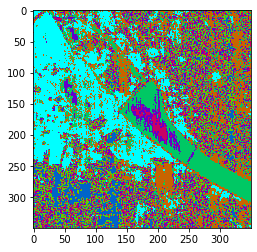

In [20]:
mahadistclass = MahalanobisDistanceClassifier(classes)
MDC = mahadistclass.classify_image(raster_mat_1)
mc = imshow(classes=MDC.T)

In [29]:
from sklearn.metrics import accuracy_score
y_true = (m.T).reshape(cols*rows)
y_pred = (MDC.T).reshape(cols*rows)
accuracy_score(y_true, y_pred)

0.004146938775510204

In [30]:
from sklearn.metrics import classification_report
y_true = (m.T).reshape(cols*rows)
y_pred = (MDC.T).reshape(cols*rows)
target_names = ['class 0', 'class 1', 'class 2', 'class 3', 'class 4', 
                'class 5', 'class 6', 'class 7', 'class 8', 'class 9','class 10','class 11']
classification_report(y_true, y_pred, target_names=target_names)

C:\Users\win\Anaconda3\envs\geo_lib\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\win\Anaconda3\envs\geo_lib\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\win\Anaconda3\envs\geo_lib\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\win\Anaconda3\envs\ge

'              precision    recall  f1-score   support\n\n     class 0       0.00      0.00      0.00     13476\n     class 1       0.00      0.00      0.00     16621\n     class 2       0.00      0.00      0.00     11484\n     class 3       0.00      0.00      0.00     27096\n     class 4       0.00      0.00      0.00     26705\n     class 5       0.00      0.00      0.00     18357\n     class 6       0.02      0.06      0.03      8760\n     class 7       0.00      1.00      0.00         1\n     class 8       0.00      0.00      0.00         0\n     class 9       0.00      0.00      0.00         0\n    class 10       0.00      0.00      0.00         0\n    class 11       0.00      0.00      0.00         0\n\n    accuracy                           0.00    122500\n   macro avg       0.00      0.09      0.00    122500\nweighted avg       0.00      0.00      0.00    122500\n'

In [33]:
# confusion matrix

from sklearn.metrics import confusion_matrix
y_true = (m.T).reshape(cols*rows)
y_pred = (MDC.T).reshape(cols*rows)
confusion_matrix(y_true, y_pred)

array([[    0,     0,     0,     0,     0,     0,    50,  1362,  9125,
           14,  2818,   107],
       [    0,     0,     0,     0,     0,     0,  6778,  5282,    43,
          821,   131,  3566],
       [    0,     0,     0,     0,     0,     0,  8104,   403,     0,
         2927,     0,    50],
       [    0,     0,     0,     0,     0,     0,  5841, 10109,     0,
          877,    10, 10259],
       [    0,     0,     0,     0,     0,     0,  3391, 11134,     1,
          276,     0, 11903],
       [    0,     0,     0,     0,     0,     0,  1849,  8226,     1,
          156,     0,  8125],
       [    0,     0,     0,     0,     0,     0,   507,  4783,     2,
           50,     0,  3418],
       [    0,     0,     0,     0,     0,     0,     0,     1,     0,
            0,     0,     0],
       [    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0],
       [    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0